In [1]:
from sklearn.datasets import load_iris,load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.<br>

## Construction of Decision Tree :
A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.<br>

## Decision Tree Representation :
Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree,testing the attribute specified by this node,then moving down the tree branch corresponding to the value of the attribute as shown in the above figure.This process is then repeated for the subtree rooted at the new node.<br><br>
<img src='Images/decision_tree.png'>
The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returning the classification associated with the particular leaf.(in this case Yes or No).<br>
For example,the instance

    (Outlook = Rain, Temperature = Hot, Humidity = High, Wind = Strong )

would be sorted down the leftmost branch of this decision tree and would therefore be classified as a negative instance.<br>

In other words we can say that decision tree represent a disjunction of conjunctions of constraints on the attribute values of instances.<br>

    (Outlook = Sunny ^ Humidity = Normal) v (Outllok = Overcast) v (Outlook = Rain ^ Wind = Weak) 

Strengths and Weakness of Decision Tree approach
The strengths of decision tree methods are:
<ul>
    <li>Decision trees are able to generate understandable rules.</li>
    <li>Decision trees perform classification without requiring much computation.</li>
    <li>Decision trees are able to handle both continuous and categorical variables.</li>
    <li>Decision trees provide a clear indication of which fields are most important for prediction or classification.</li>
</ul>
The weaknesses of decision tree methods :
<ul>
    <li>Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.</li>
    <li>Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.</li>
    <li>Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.</li>
</ul>

# Types of Decision Trees

## 1) DecisionTreeClassifier
Decision  tree  learners  attempt  to  find  a  decision  rule  that  produces  the  greatestdecrease in impurity at a node. While there are a number of measurements of impur‐ity, by default DecisionTreeClassifier uses Gini impurity:<br>
<img src="Images/decision_tree-2.png">

where G(t) is the Gini impurity at node t and pi is the proportion of observations ofclass c at node t. This process of finding the decision rules that create splits to increaseimpurity  is  repeated  recursively  until  all  leaf  nodes  are  pure  (i.e.,  contain  only  oneclass) or some arbitrary cut-off is reached.In  scikit-learn, DecisionTreeClassifier  operates  like  other  learning  methods;  afterthe model is trained using fit we can use the model to predict the class of an observation

In [2]:
x = load_iris()['data']
y = load_iris()['target']

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [3]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion='gini',splitter='best',random_state=0)
# decision_tree_model = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)

decision_tree_model.fit(x_train,y_train)

pred = decision_tree_model.predict(x_test)

In [4]:
pd.DataFrame(decision_tree_model.feature_importances_, index=load_iris()['feature_names'],columns=['Importance'])

,Importance
sepal length (cm),0.052750
sepal width (cm),0.008207
petal length (cm),0.026006
petal width (cm),0.913037


In [5]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  3 11]]
0.9210526315789473


D:\Installed\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


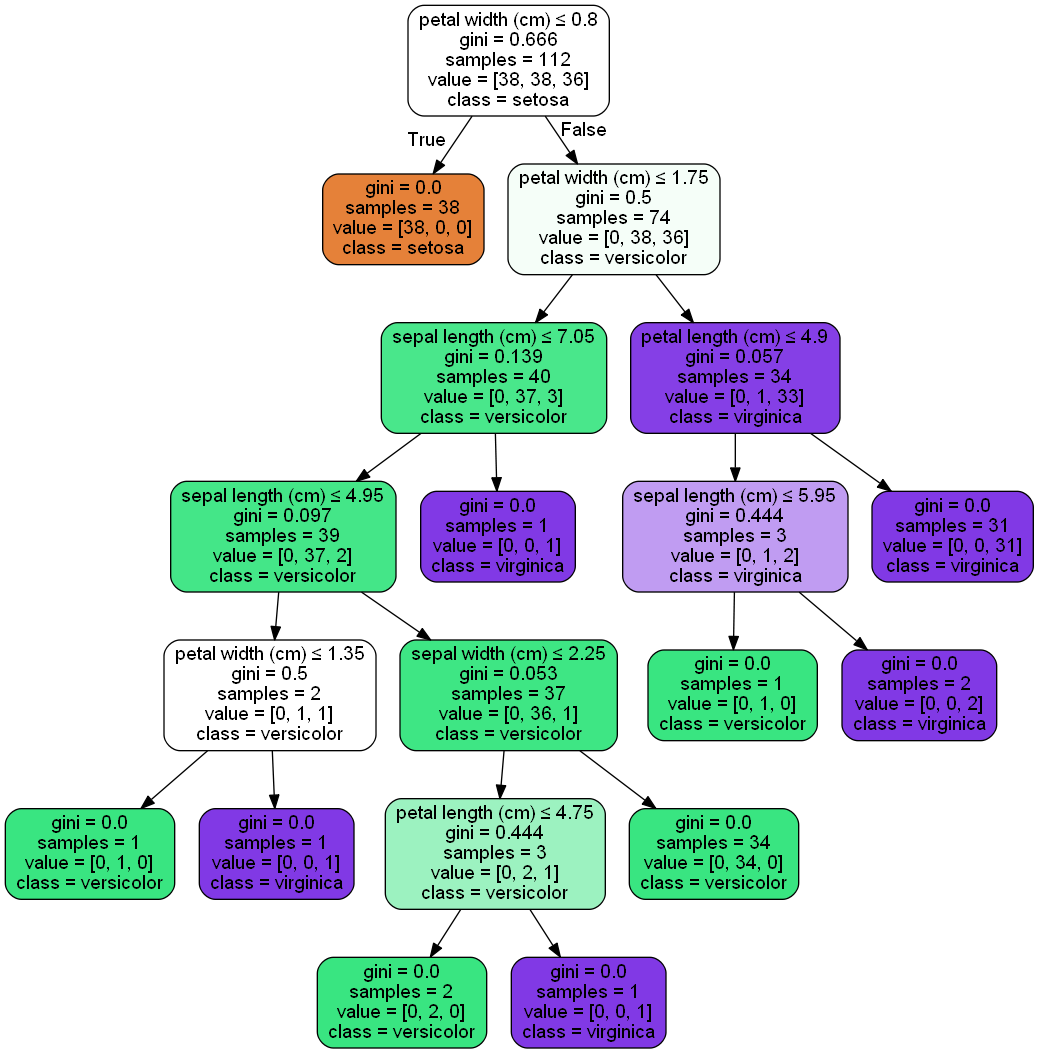

In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = load_iris()['feature_names'],class_names=load_iris()["target_names"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("Images/tree.png")
Image(graph.create_png())

## 2) Decision Tree Regressor
Decision  tree  regression  works  similarly  to  decision  tree  classification;  however,instead of reducing Gini impurity or entropy, potential splits are by default measuredon how much they reduce mean squared error (MSE):

where yi  is  the  true  value  of  the  target  and yi  is  the  predicted  value.  In  scikit-learn,decision  tree  regression  can  be  conducted  using DecisionTreeRegressor.  Once  we have trained a decision tree, we can use it to predict the target values for a data.

In [7]:
x = load_boston()['data']
y = load_boston()['target']

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [8]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

decision_tree_model.fit(x_train,y_train)

pred = decision_tree_model.predict(x_test)

In [9]:
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

3.3771653543307094
25.375354330708667


# Random Forest Classifier
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.<br><br>

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.<br>

## How does the algorithm work?

It works in four steps:
<ul>
    <li>Select random samples from a given dataset.</li>
    <li>Construct a decision tree for each sample and get a prediction result from each decision tree.</li>
    <li>Perform a vote for each predicted result.</li>
    <li>Select the prediction result with the most votes as the final prediction.</li>
</ul>
<img src="Images/random_forest.png">

<h3> Advantages:</h3>
<ul>
    <li>Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.</li>
    <li>It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.</li>
    <li>The algorithm can be used in both classification and regression problems.</li>
    <li>Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.</li>
    <li>You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.</li>
</ul>

<h3>Disadvantages:</h3>
<ul>
    <li>Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.</li>
    <li>The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.</li>
</ul>

## Finding important features
Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.<br>

This score will help you choose the most important features and drop the least important ones for model building.<br>

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.<br>

### Random Forests vs Decision Trees
<ul>
    <li>Random forests is a set of multiple decision trees.</li>
    <li>Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.</li>
    <li>Decision trees are computationally faster.</li>
    <li>Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.</li>
</ul>

# Types of Random Forests
## 1) Random Forest Classifier

In [10]:
x = load_iris()['data']
y = load_iris()['target']

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [15]:
# print(confusion_matrix(y_test,pred))
# print(accuracy_score(y_test,pred))

In [16]:
imp_features = pd.DataFrame(clf.feature_importances_,index=load_iris()['feature_names'],columns=['Importance'])
imp_features

,Importance
sepal length (cm),0.070186
sepal width (cm),0.016499
petal length (cm),0.463325
petal width (cm),0.449990


No handles with labels found to put in legend.


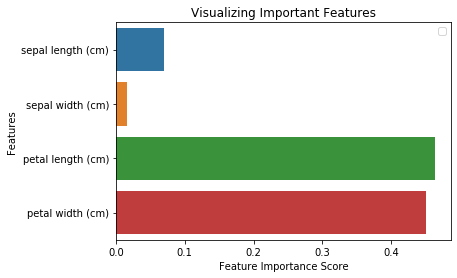

In [17]:
# Creating a bar plot
sns.barplot(x=imp_features['Importance'],y=imp_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## 2) Random Forest Regressor

In [18]:
x = load_boston()['data']
y = load_boston()['target']

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1,random_state=0)

rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

In [20]:
mean_absolute_error(y_test,y_pred)

2.5843385826771645

In [21]:
mean_squared_error(y_test,y_pred)

20.157382228346442

As we can see that Random Forest Regressor and Classifier have performed well than those of Decision Trees. So it is useful to use Random Forests in your datasets.